#Business Question

1. Which product lines generate the most and least revenue?
2. What are the temporal patterns in sales performance?
3. How does deal size and quantity ordered influence overall sales?




#Import Library and Data Collection

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
df = pd.read_csv('SalesData.csv')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


#Data Preparation

In [ ]:
# Data Cleaning
check = pd.DataFrame({
    'Empty Data': df.isnull().sum(),
    'Duplicate Data': df.duplicated().sum(),
    'NaNN Data': df.isna().sum(),
    'Type Data': df.dtypes
})

check

,Empty Data,Duplicate Data,NaNN Data,Type Data
ORDERNUMBER,0,1,0,int64
QUANTITYORDERED,0,1,0,int64
PRICEEACH,0,1,0,float64
ORDERDATE,0,1,0,object
STATUS,0,1,0,object
PRODUCTLINE,0,1,0,object
PRODUCTCODE,0,1,0,object
CUSTOMERNAME,0,1,0,object
CITY,0,1,0,object
DEALSIZE,0,1,0,object


In [ ]:
duplicates = df[df.duplicated()]
duplicates

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
121,10111,28,64.33,3/25/2003 0:00,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small


In [ ]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [ ]:
df_cleaned.duplicated().sum()

0

In [ ]:
# Convert ORDERDATE to datetime format
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

<ipython-input-49-b1dce81f9d47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])


In [ ]:
# Feature Engineering
# Create a new 'SALES' column
df_cleaned['SALES'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

<ipython-input-50-88fac8fe2383>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SALES'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']


In [ ]:
df_cleaned.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,SALES
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00


#Exploratory Data Analysis (EDA)

In [ ]:
# 1. Sales by Product Line
product_line_sales = df_cleaned.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
product_line_sales_sorted = product_line_sales.sort_values(by='SALES', ascending=False)

# 2. Temporal Sales Trends
sales_over_time = df_cleaned.groupby('ORDERDATE')['SALES'].sum().reset_index()

# 3. Deal Size Contribution
deal_size_contribution = df_cleaned.groupby('DEALSIZE')['SALES'].sum().reset_index()
deal_size_contribution['Percentage'] = (deal_size_contribution['SALES'] / deal_size_contribution['SALES'].sum()) * 100

<ipython-input-53-38e9e4e6e862>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(gradient_cmap, len(product_line_sales_sorted))  # Create gradient colors


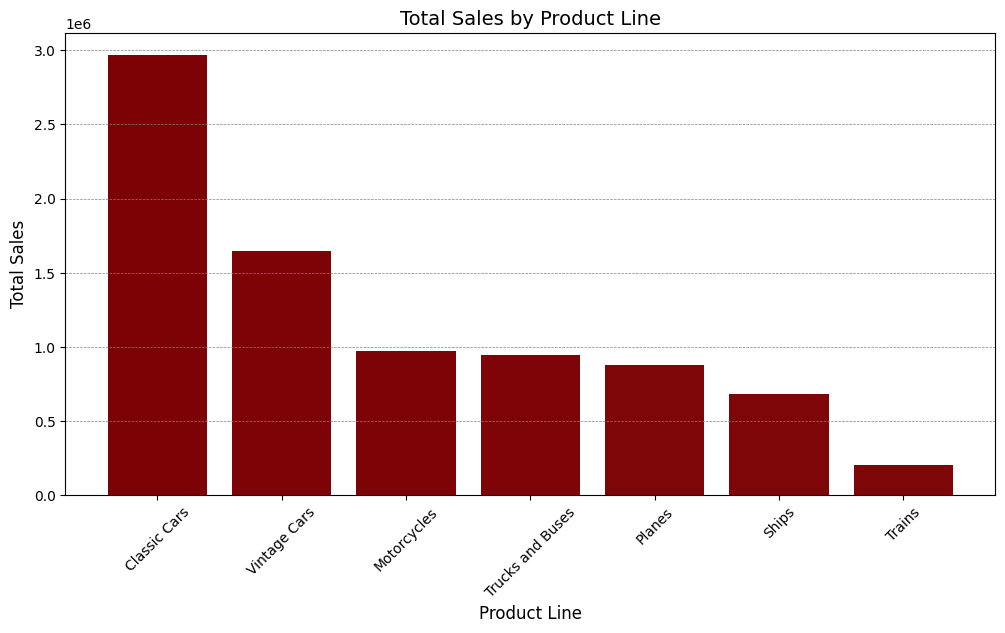

In [ ]:
# Define Gradient Color Palette
gradient_cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#7D0205', '#AAAAAA'])

# Visualizations
# 1. Bar Chart for Sales by Product Line
plt.figure(figsize=(12, 6))
colors = plt.cm.get_cmap(gradient_cmap, len(product_line_sales_sorted))  # Create gradient colors
bars = plt.bar(product_line_sales_sorted['PRODUCTLINE'], product_line_sales_sorted['SALES'],
               color=[colors(i) for i in range(len(product_line_sales_sorted))])
plt.title('Total Sales by Product Line', fontsize=14)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.show()

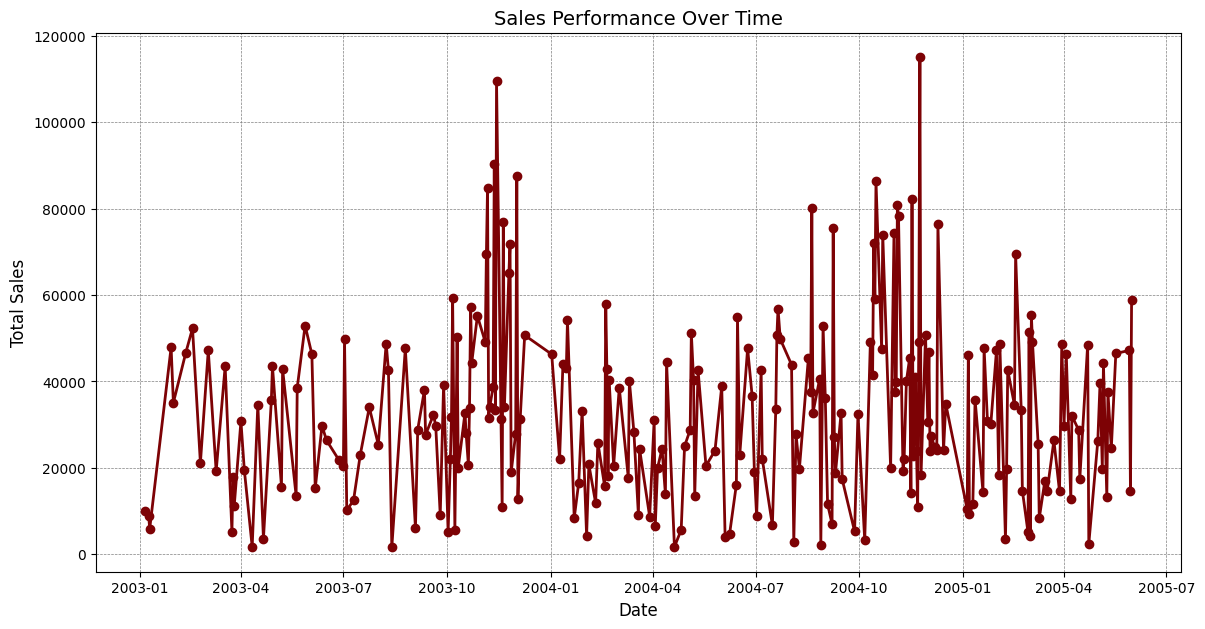

In [ ]:
# 2. Line Chart for Temporal Sales Trends
plt.figure(figsize=(14, 7))
plt.plot(sales_over_time['ORDERDATE'], sales_over_time['SALES'], color='#7D0205', marker='o', linewidth=2)
plt.title('Sales Performance Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()


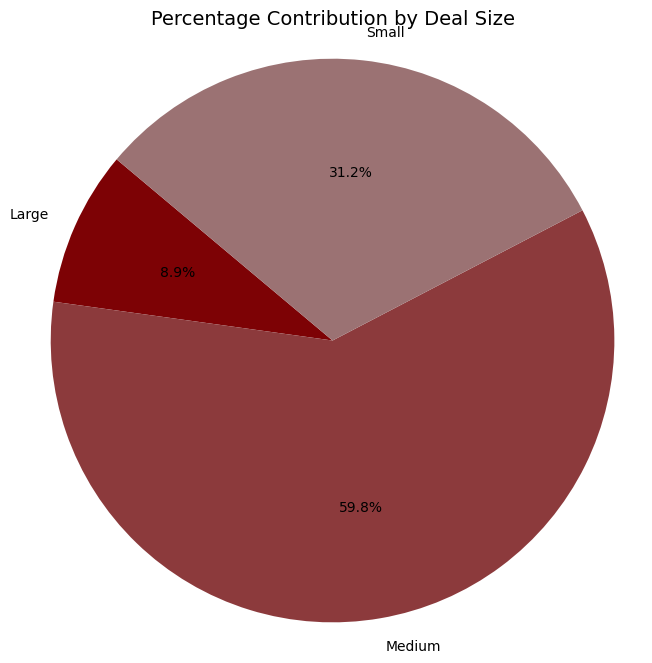

In [ ]:
# 3. Pie Chart for Deal Size Contribution
plt.figure(figsize=(8, 8))
colors = [gradient_cmap(i / len(deal_size_contribution)) for i in range(len(deal_size_contribution))]
plt.pie(deal_size_contribution['Percentage'], labels=deal_size_contribution['DEALSIZE'], colors=colors,
        autopct='%1.1f%%', startangle=140)
plt.title('Percentage Contribution by Deal Size', fontsize=14)
plt.axis('equal')
plt.show()

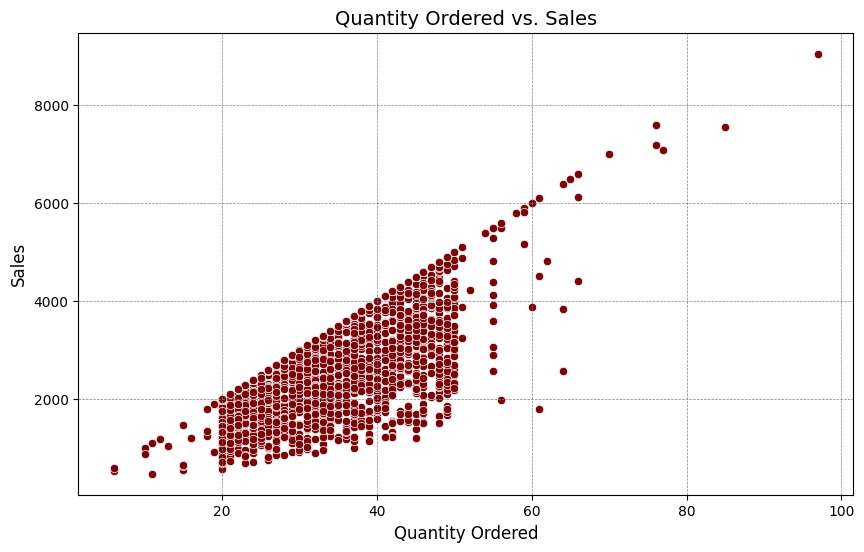

In [ ]:
# 4. Scatter Plot for Quantity Ordered vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df_cleaned, color='#7D0205')
plt.title('Quantity Ordered vs. Sales', fontsize=14)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [ ]:
# 4. Correlation between Quantity Ordered and Sales
correlation = df_cleaned['QUANTITYORDERED'].corr(df_cleaned['SALES'])
print(f"Correlation between Quantity Ordered and Sales: {correlation}")


Correlation between Quantity Ordered and Sales: 0.748819689876465
